## Data Description:
The data contains features extracted from the silhouette of
vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van,
Saab 9000 and an Opel Manta 400 cars. This particular
combination of vehicles was chosen with the expectation that
the bus, van and either one of the cars would be readily
distinguishable, but it would be more difficult to distinguish
between the cars.

# Load the Dataset and find the datatypes

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

sns.set_style(style='darkgrid')  # Setting the plot style. Purely for aesthetic purposes

In [3]:
vData = pd.read_csv("vehicle.csv")  
vData.shape # to check no. of Rows & Columns in dataframe

(846, 19)

In [4]:
vData.head(10) # to show the first 5 rows of a pandas dataframe

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [382]:
vData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

- The dataset is of shape (846,19)
- All the columns seem to be continuous numeric, except vehicle 'class', which is categotical 'object'.
- The data points in each column is not same. There are some missing values, which need to be treated properly.

# 5 Point Summary

In [383]:
vData.describe().transpose() # descriptive statistics of each of the attributes

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

- Most of the attributes have Mean approximately equal to Median (50%), except few like scatter_ratio, scaled_variance &  scaled_variance.1
- The missing values may be removed as there would still be sufficient values to evaluate & devlop a model.
- There is right skew & few outliers in radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, pr.axis_rectangularity, scaled_variance, scaled_radius_of_gyration, skewness_about & skewness_about.1

In [384]:
vData['class'].value_counts() # to know distribution of each type of vehicle, ie. car, bus, van

car    429
bus    218
van    199
Name: class, dtype: int64

In [385]:
vData.isna().apply(pd.value_counts).transpose()   #missing value check

False  True 
compactness                  846.0    NaN
circularity                  841.0    5.0
distance_circularity         842.0    4.0
radius_ratio                 840.0    6.0
pr.axis_aspect_ratio         844.0    2.0
max.length_aspect_ratio      846.0    NaN
scatter_ratio                845.0    1.0
elongatedness                845.0    1.0
pr.axis_rectangularity       843.0    3.0
max.length_rectangularity    846.0    NaN
scaled_variance              843.0    3.0
scaled_variance.1            844.0    2.0
scaled_radius_of_gyration    844.0    2.0
scaled_radius_of_gyration.1  842.0    4.0
skewness_about               840.0    6.0
skewness_about.1             845.0    1.0
skewness_about.2             845.0    1.0
hollows_ratio                846.0    NaN
class                        846.0    NaN

In [386]:
vData.isnull().sum() # alternate method to find missing data

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [387]:
vData = vData.dropna()

In [388]:
vData.shape # to check shape of Dataframe after dropping rows where data was missing.
#So we are left finally with 813 rows, which is sufficient data for analysis

(813, 19)

In [389]:
vData.isna().apply(pd.value_counts).transpose()   #missing value check

False
compactness                    813
circularity                    813
distance_circularity           813
radius_ratio                   813
pr.axis_aspect_ratio           813
max.length_aspect_ratio        813
scatter_ratio                  813
elongatedness                  813
pr.axis_rectangularity         813
max.length_rectangularity      813
scaled_variance                813
scaled_variance.1              813
scaled_radius_of_gyration      813
scaled_radius_of_gyration.1    813
skewness_about                 813
skewness_about.1               813
skewness_about.2               813
hollows_ratio                  813
class                          813

# To replace class values with Number, car = 1, bus =2, van = 3

In [390]:
vData['class']=vData['class'].replace({"car":1,"bus":2,"van":3})

In [391]:
vData.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      3  
1             189.0            199      3  
2             188.0            196      1  
3             199.0            207      3  
4             180.0            183      2

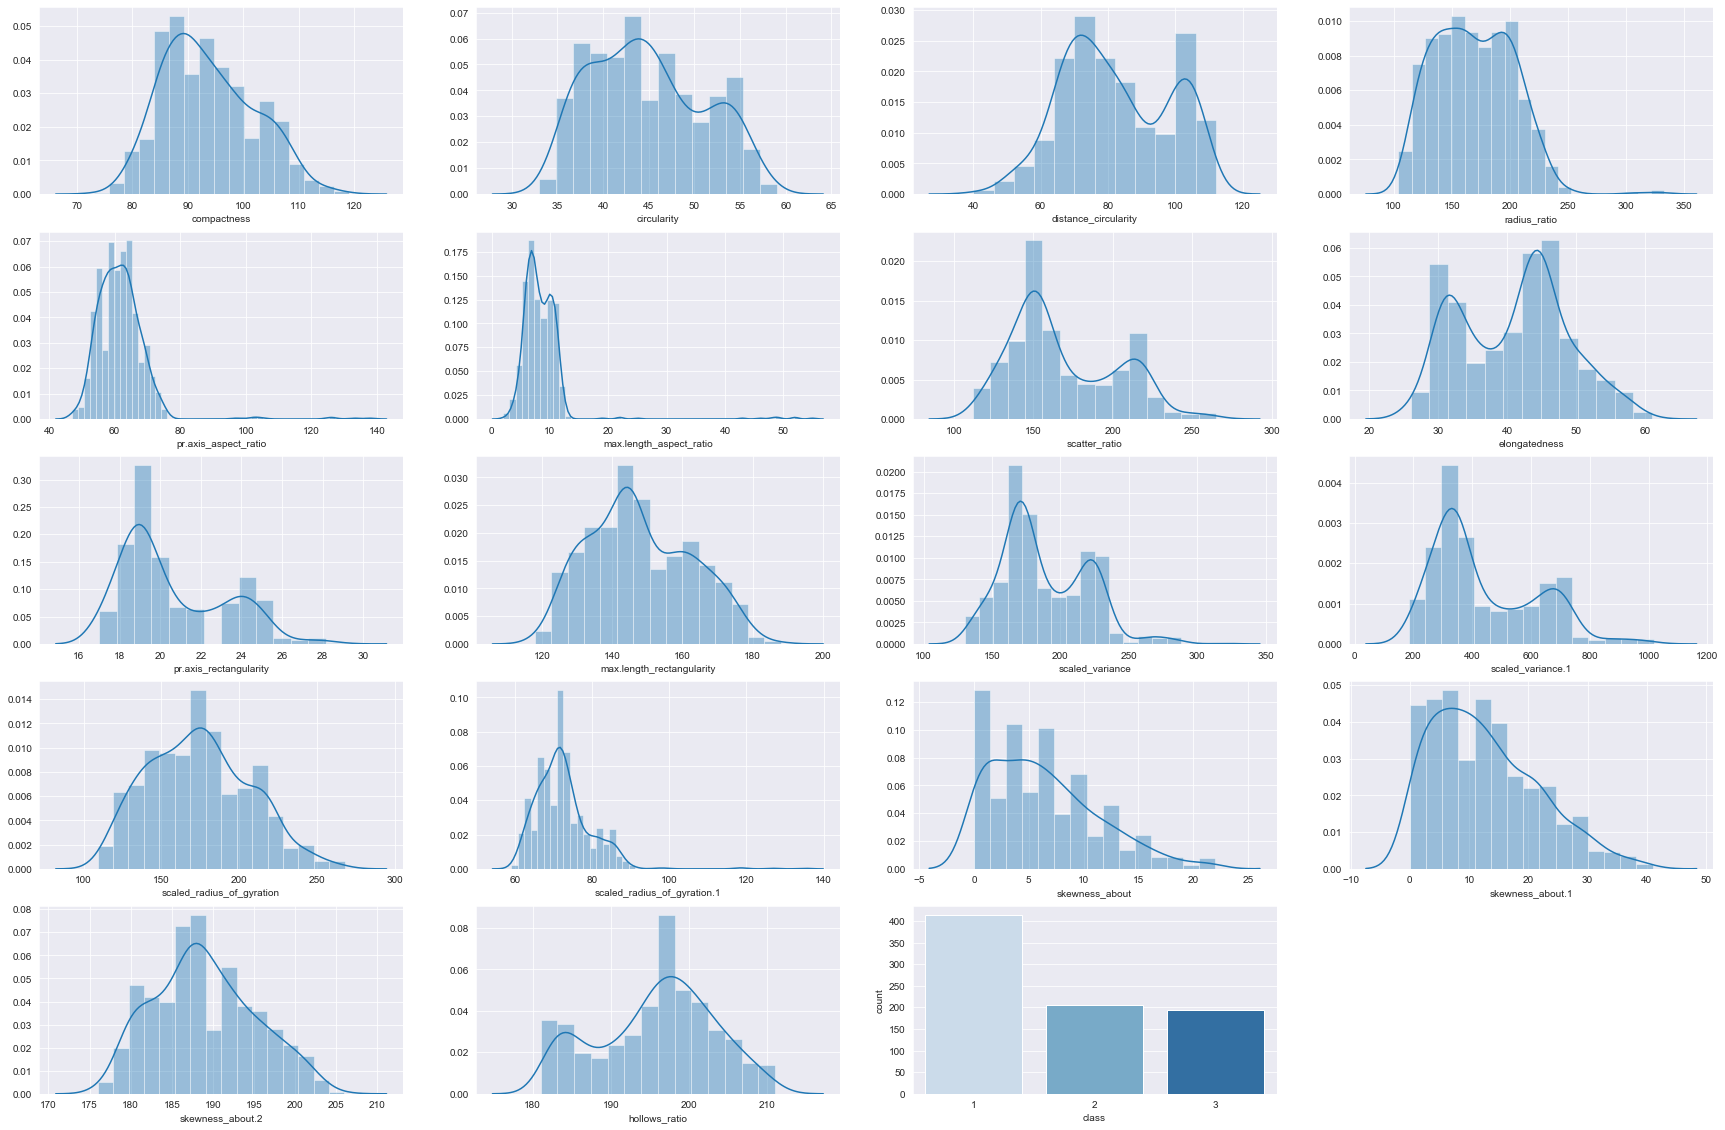

In [392]:
plt.figure(figsize= (30,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in vData.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(5, 4, pos)   # plot grid
    if feature in ['compactness','circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2','hollows_ratio']:   # Plot histogram for all the continuous columns
         sns.distplot(vData[feature], kde= True )   
    else:
        sns.countplot(vData[feature], palette= 'Blues')    # Plot bar chart for all the continous columns
    pos += 1  # to plot over the grid one by one 

- There is right skew & few outliers in radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, pr.axis_rectangularity, scaled_variance, scaled_radius_of_gyration, skewness_about & skewness_about.1
- There are many attributes in the dataframe added just a scaled version of the original attribute. See below list:
scaled_variance& scaled_variance.1
scaled_radius_of_gyration & scaled_radius_of_gyration.1
skewness_about & skweness_about.1 & skweness_about.2
These above 7 variables are representation of 3 paraeters only. PCA will definitely help to remove these attributes.


In [393]:
vData['class'].value_counts() # count of class groups, 1-> car, 2-> bus, 3-> van

1    413
2    205
3    195
Name: class, dtype: int64

# Multivariate Analysis & its distributions

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


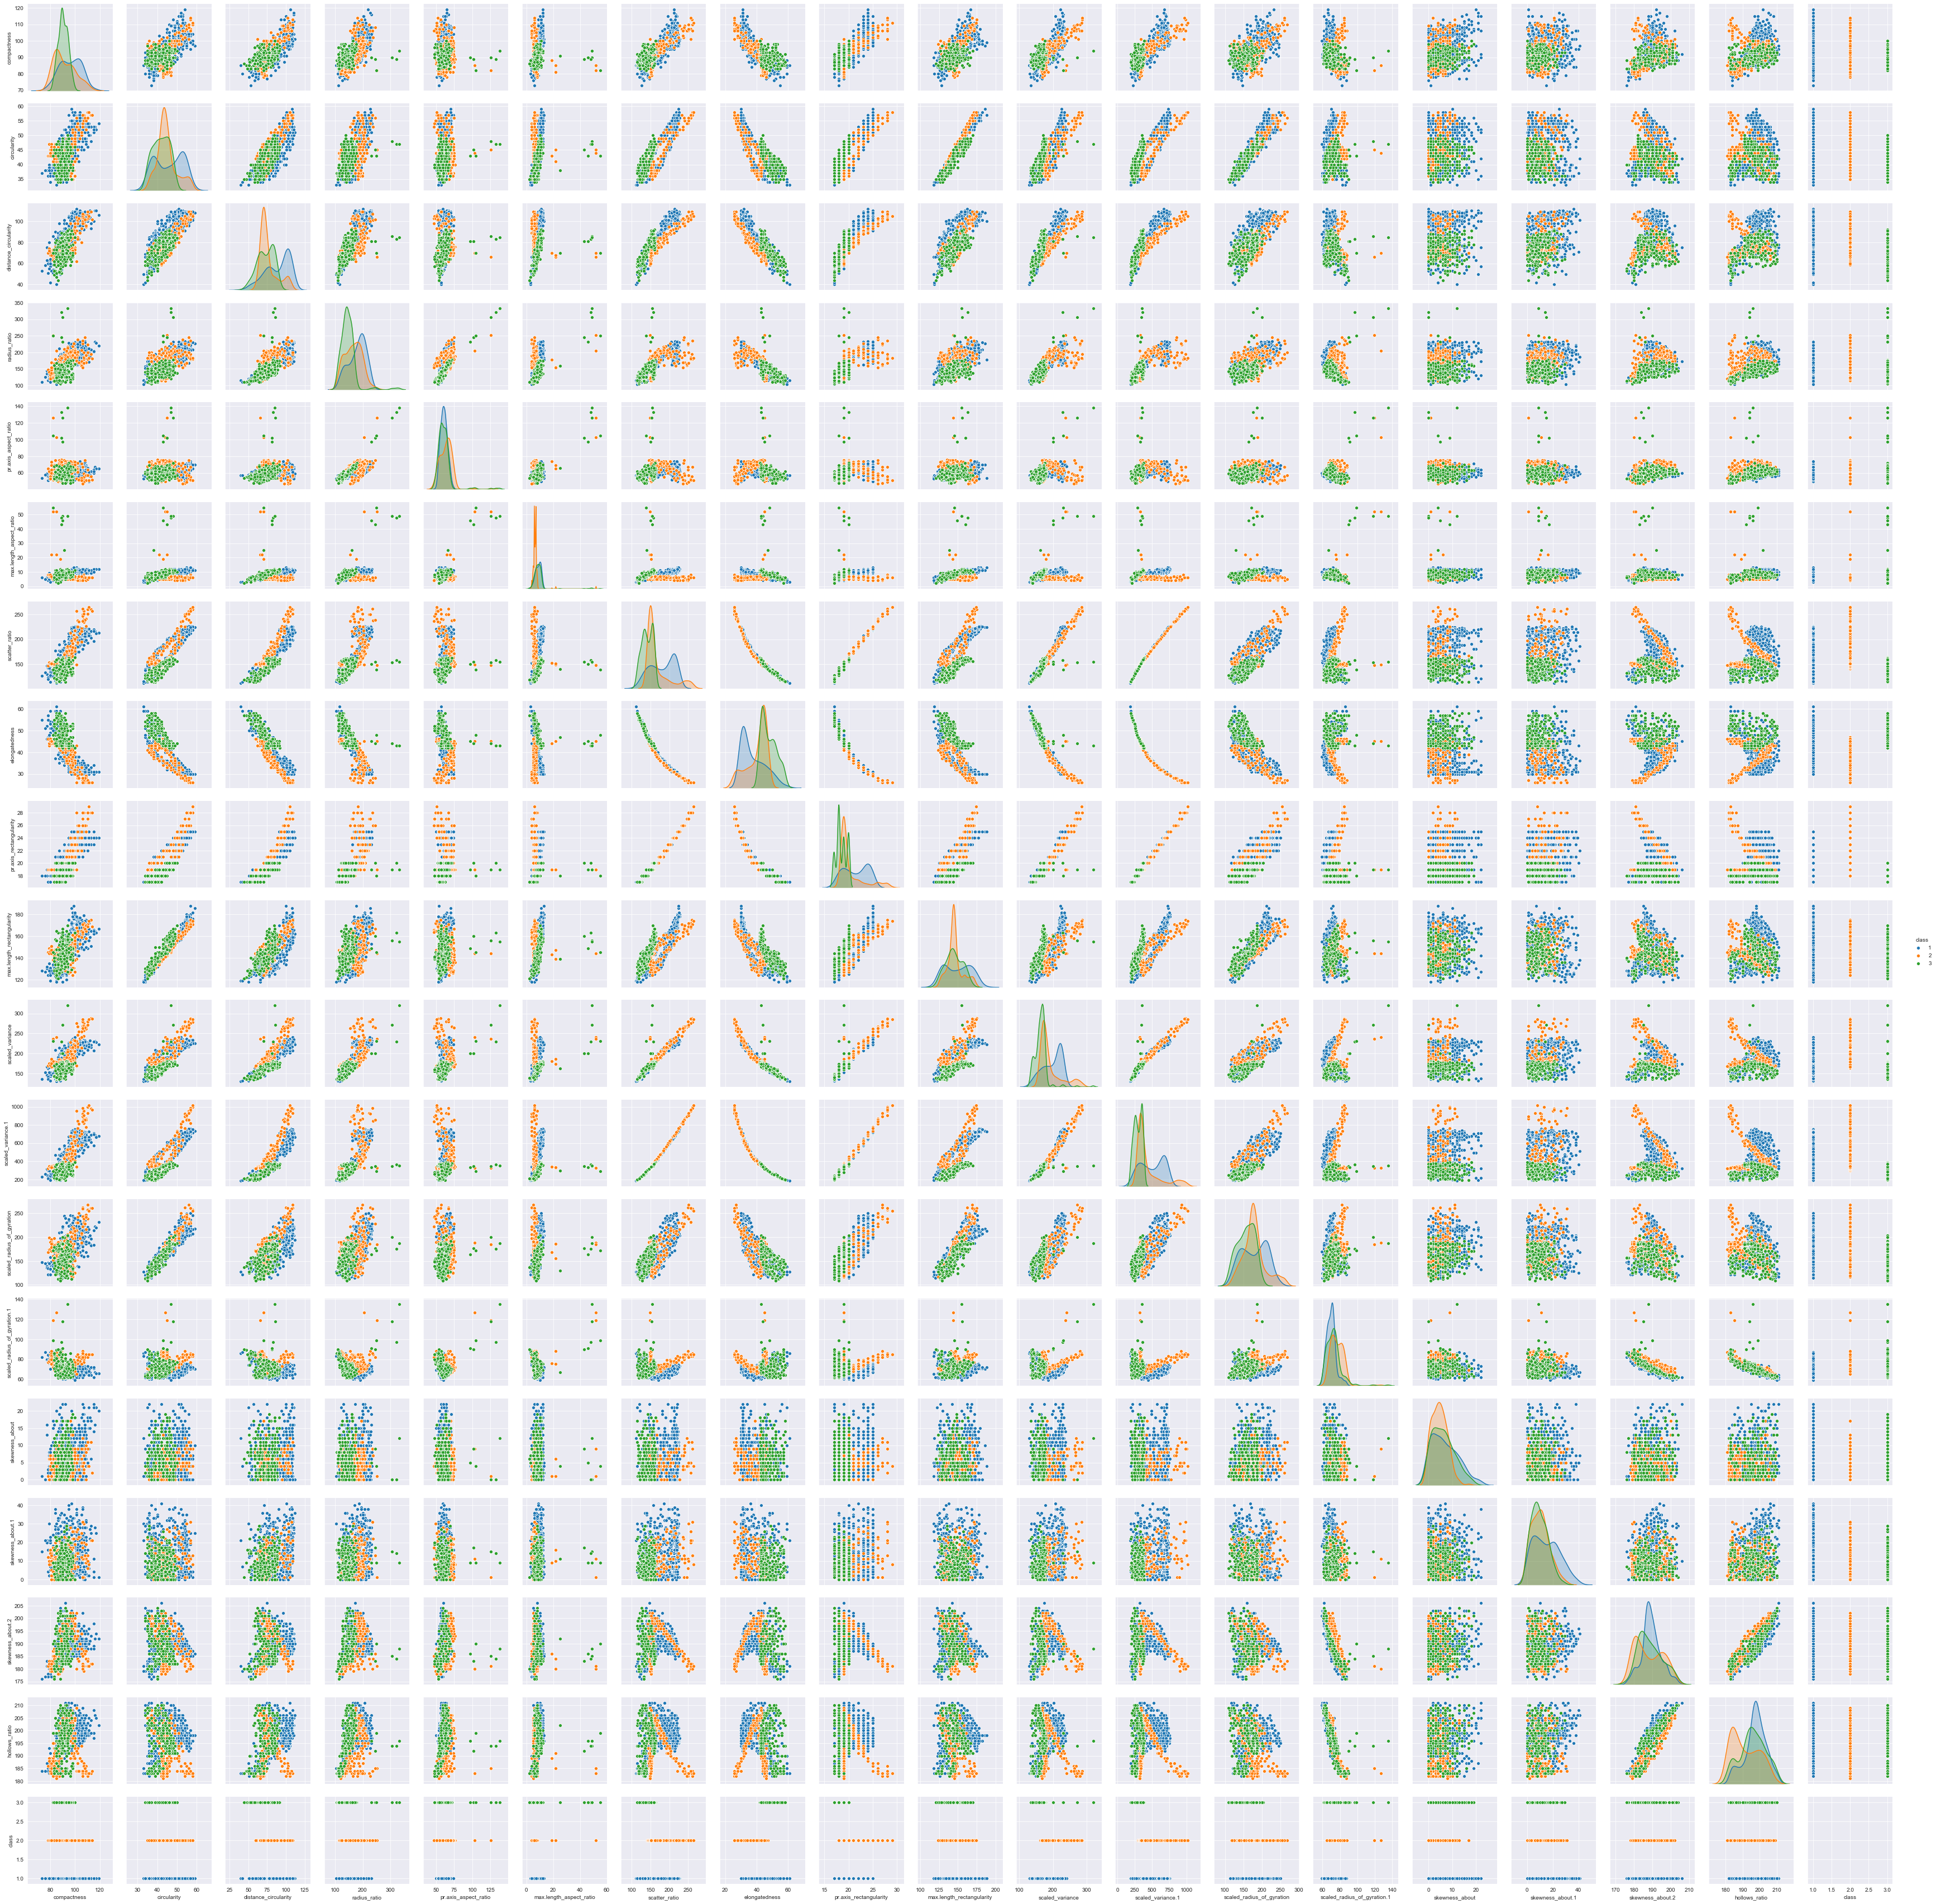

In [394]:
sns.pairplot(vData, hue = 'class',diag_kind='kde')   # to plot density curve instead of histogram on the diag

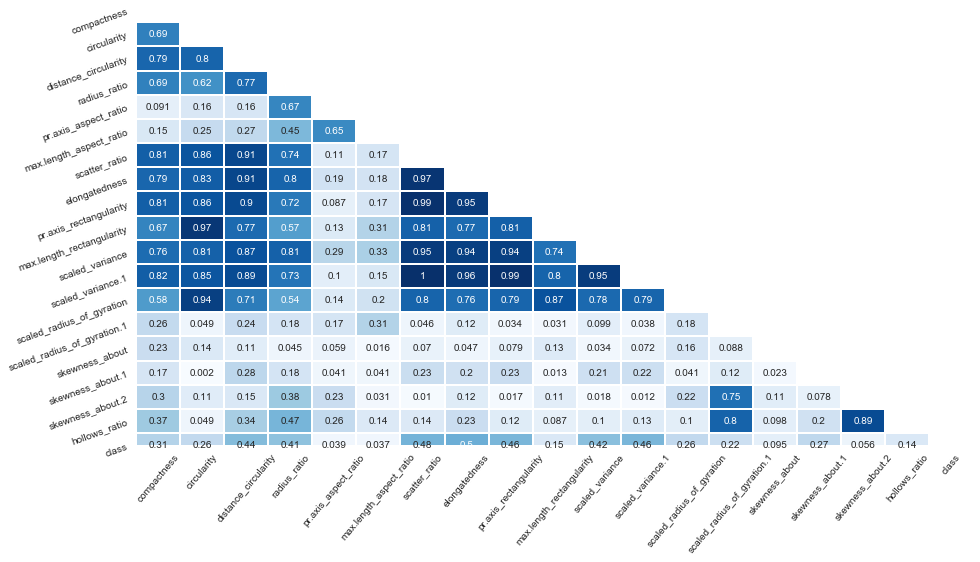

In [395]:
# Correlation among the attributes

corr = abs(vData.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

We can see lot of correlation between data. The dark blue colour attributes like circularity, distance_circularity,radius_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration are highly  correlated. 

In [396]:
# independant variables
X = vData.drop(['class'], axis=1)
# the dependent variable
y = np.ravel(vData[['class']])

In [397]:
XScaled=X.apply(zscore) # to set common scale for all attributes of data.
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  
0         -0.321809       0.171837  
1          0.003400       0.442318  
2         -0.159204       0.036596  
3          1.629444       1.524243  
4         -1.460039      -1.721531

In [398]:
XScaled.astype('float64').dtypes # mske data types of all variables same, as 'float64'

compactness                    float64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio        float64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity      float64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                  float64
dtype: object

## Split data into train & test

In [399]:
x_train, x_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.3, random_state=1)

## Apply PCA

In [400]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
   0.81502868 -0.78902127  0.81522961  0.67573322  0.76532752  0.82125027
   0.58212123 -0.25875528  0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
   0.85920548 -0.8261242   0.85719089  0.96655501  0.80710097  0.85197956
   0.93674669  0.0491303   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
   0.91014241 -0.9138366   0.89836576  0.77441118  0.86674929  0.89288735
   0.70655787 -0.23843852  0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
   0.74438595 -0.79674104  0.71709175  0.57118076  0.80778118  0.73267385
   0.54530637 -0.17556405  0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0.6528959
   0.11383635 -0.19142882  0.0870987

In [401]:
pca = PCA(n_components=18) # PCA on all attributes, i.e. 18 no.s
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The eigen Values

In [402]:
print(pca.explained_variance_)

[9.45338700e+00 2.98961888e+00 1.91768721e+00 1.17011696e+00
 9.29094522e-01 5.32171101e-01 3.59073770e-01 2.22360825e-01
 1.56093142e-01 9.28191209e-02 6.35293025e-02 4.43920604e-02
 3.47623783e-02 2.12103219e-02 1.61152840e-02 1.31079986e-02
 6.26175180e-03 3.65863172e-04]


In [403]:
print(pca.components_)

[[ 2.74447428e-01  2.94003600e-01  3.04380218e-01  2.68888600e-01
   8.30199914e-02  9.84825471e-02  3.16688948e-01 -3.13205048e-01
   3.13612229e-01  2.81285672e-01  3.09161565e-01  3.14163506e-01
   2.70337322e-01 -2.56036923e-02  3.96799548e-02  6.31600075e-02
   3.09410342e-02  7.93661290e-02]
 [-1.27105989e-01  1.34430321e-01 -7.21448351e-02 -1.76416250e-01
  -9.87633531e-02  3.02068515e-02  4.43899402e-02  1.52539710e-02
   5.72306050e-02  1.20324381e-01  6.19096771e-02  4.80210991e-02
   2.10169704e-01  4.93793797e-01 -5.62601909e-02 -1.21035426e-01
  -5.44491703e-01 -5.38881650e-01]
 [-1.15778231e-01 -3.64513515e-02 -5.51881577e-02  2.81804540e-01
   6.45768877e-01  5.86412351e-01 -9.85848213e-02  5.66515157e-02
  -1.12039253e-01 -2.41324720e-02  5.97234736e-02 -1.09452782e-01
  -3.70630986e-02  2.75779539e-01 -1.10191782e-01 -8.04993535e-02
   3.17280047e-02  5.69462532e-02]
 [ 8.00766389e-02  1.90342131e-01 -6.93709791e-02 -4.46505645e-02
   3.00532206e-02  2.97502955e-02 -9.

And the percentage of variation explained by each eigen Vector

In [404]:
print(pca.explained_variance_ratio_)

[5.24542179e-01 1.65885645e-01 1.06407135e-01 6.49265390e-02
 5.15528736e-02 2.95286958e-02 1.99240058e-02 1.23381844e-02
 8.66117477e-03 5.15027513e-03 3.52506448e-03 2.46319209e-03
 1.92886778e-03 1.17690183e-03 8.94192335e-04 7.27326420e-04
 3.47447209e-04 2.03007309e-05]


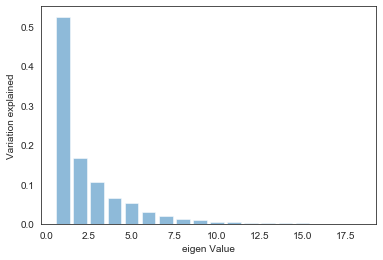

In [405]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

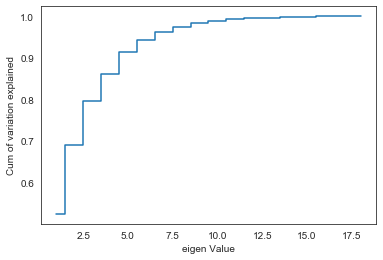

In [406]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Dimensionality Reduction
Now 7 dimensions seems very reasonable. With 7 variables we can explain over 95% of the variation in the original data

In [407]:
pca7 = PCA(n_components=7)
pca7.fit(XScaled)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
Xpca7 = pca7.transform(XScaled)

[[ 2.74447428e-01  2.94003600e-01  3.04380218e-01  2.68888600e-01
   8.30199914e-02  9.84825471e-02  3.16688948e-01 -3.13205048e-01
   3.13612229e-01  2.81285672e-01  3.09161565e-01  3.14163506e-01
   2.70337322e-01 -2.56036923e-02  3.96799548e-02  6.31600075e-02
   3.09410342e-02  7.93661290e-02]
 [-1.27105989e-01  1.34430321e-01 -7.21448351e-02 -1.76416250e-01
  -9.87633531e-02  3.02068515e-02  4.43899402e-02  1.52539710e-02
   5.72306050e-02  1.20324381e-01  6.19096771e-02  4.80210991e-02
   2.10169704e-01  4.93793797e-01 -5.62601909e-02 -1.21035426e-01
  -5.44491703e-01 -5.38881650e-01]
 [-1.15778231e-01 -3.64513515e-02 -5.51881577e-02  2.81804540e-01
   6.45768877e-01  5.86412351e-01 -9.85848213e-02  5.66515157e-02
  -1.12039253e-01 -2.41324720e-02  5.97234736e-02 -1.09452782e-01
  -3.70630986e-02  2.75779539e-01 -1.10191782e-01 -8.04993535e-02
   3.17280047e-02  5.69462532e-02]
 [ 8.00766389e-02  1.90342131e-01 -6.93709791e-02 -4.46505645e-02
   3.00532206e-02  2.97502955e-02 -9.

In [408]:
Xpca7

array([[ 0.35224921, -0.14102681,  0.96183193, ...,  0.06961594,
        -0.74030147, -0.8820798 ],
       [-1.5780723 , -0.4221973 , -0.36526142, ...,  0.68589854,
        -0.53058002,  0.34563917],
       [ 3.78255625,  0.25325744,  0.06175618, ...,  0.71733688,
         0.72838769, -0.0159406 ],
       ...,
       [ 4.83112974,  0.07323619,  0.48997353, ..., -1.35923931,
        -0.19511989,  0.59951984],
       [-3.26941568, -1.01866536, -0.34344083, ...,  0.04764038,
        -0.42356314, -0.24114332],
       [-4.75521696,  0.30767001, -0.58216391, ..., -0.05228634,
        -0.34852771,  0.05533584]])

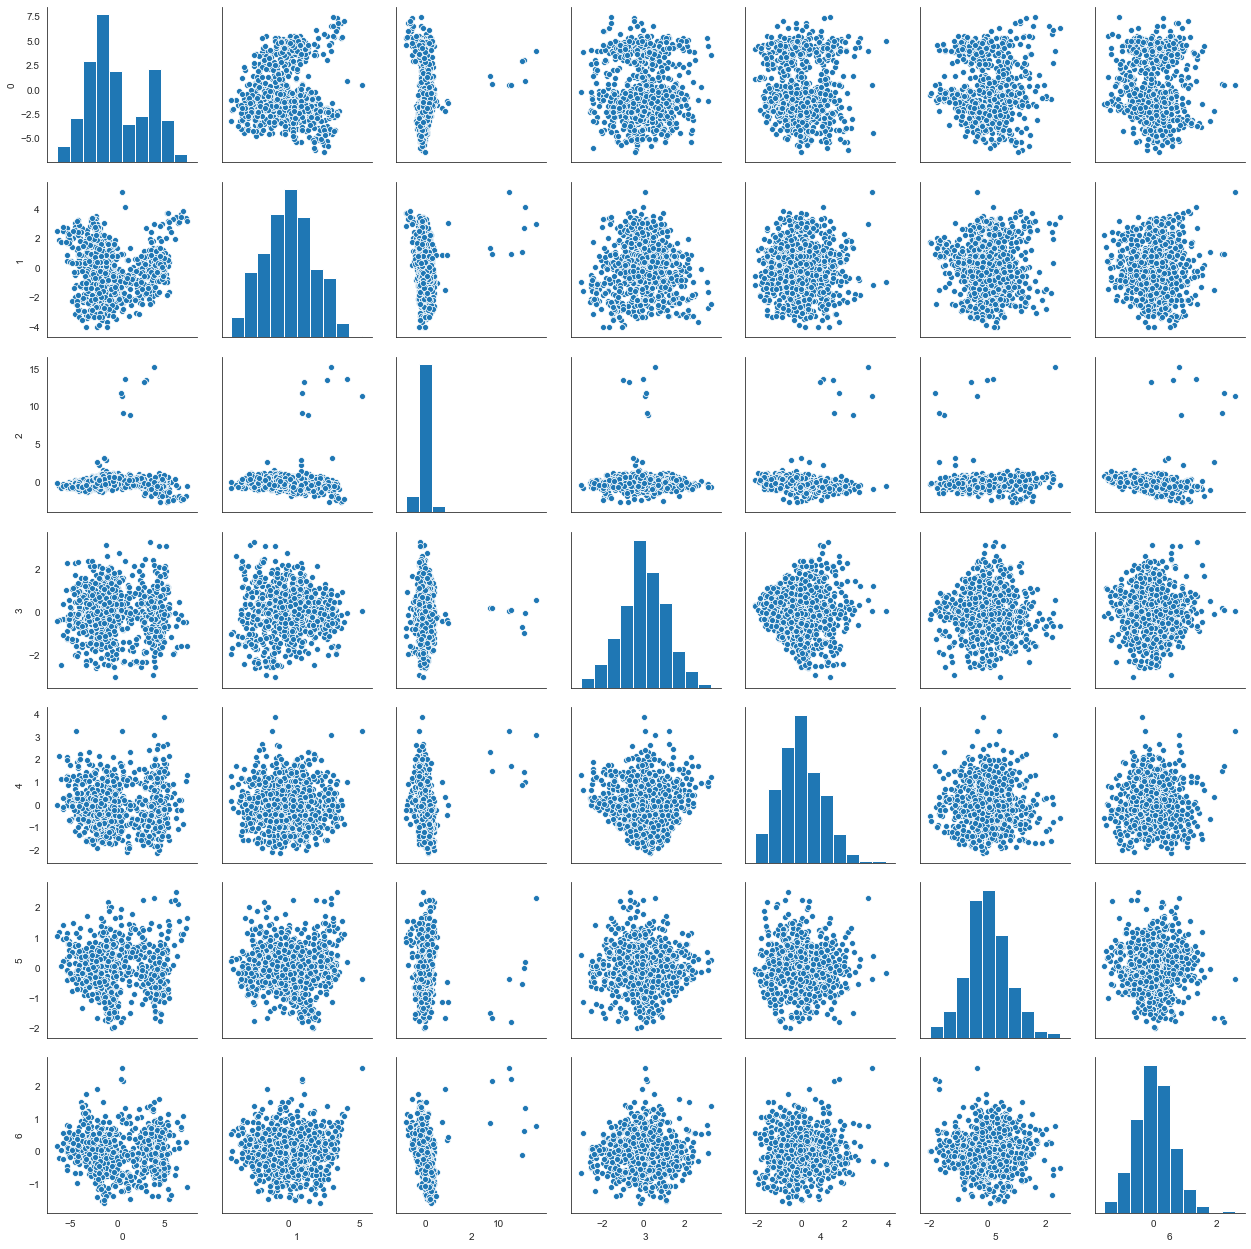

In [409]:
sns.pairplot(pd.DataFrame(Xpca7))

The plot above shows that the PCA componenets are now independent of one other.

## Apply Support Vector Machine on Origninal Scaled data

In [410]:
clf = svm.SVC(gamma=0.025, C=3)

In [412]:
clf.fit(x_train , y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [413]:
model_score_scaled = clf.score(x_test, y_test)
print(model_score_scaled)

0.9713114754098361


## Re-Apply Support Vector Machine with PCA components

In [414]:
clf.fit(Xpca7 , y)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [415]:
model_score_pca = clf.score(Xpca7, y)
print(model_score_pca)

0.9360393603936039


Looks like by reducing dimensionality from 18 to 7, with Principal components that capture 95% variance of the data, we only dropped around 3.53% in accuracy. This is insample (on training data) and hence a drop in accuracy is expected. Still seems easy to justify the dropping of variables. An out of sample (on test data), with the 7 independent variables is likely to do better since that would be less of an over-fit. 

## Apply K fold cross validation on original scaled data (Logistic Regression)

In [418]:
num_folds = 10
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
model_scaled = LogisticRegression(solver='lbfgs', multi_class='auto')
results = cross_val_score(model_scaled, XScaled, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.95121951 0.96341463 0.98780488 0.9382716  0.96296296 0.9382716
 0.9382716  0.98765432 0.9382716  0.9382716 ]
Accuracy: 95.444% (1.920%)


Re- apply K fold on PCA components

In [419]:
kfold = KFold(n_splits=num_folds, random_state=seed)
model_pca = LogisticRegression(solver='lbfgs', multi_class='auto')
results = cross_val_score(model_pca, Xpca7, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.76829268 0.86585366 0.85365854 0.72839506 0.75308642 0.85185185
 0.75308642 0.81481481 0.72839506 0.74074074]
Accuracy: 78.582% (5.224%)


## Apply K fold cross validation on original scaled data (SVM)

In [422]:
num_folds = 10
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
model_svm_scaled = clf.fit(x_train , y_train)
results = cross_val_score(model_svm_scaled, XScaled, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.95121951 0.97560976 0.97560976 0.98765432 0.98765432 0.97530864
 0.96296296 0.98765432 0.96296296 0.97530864]
Accuracy: 97.419% (1.153%)


In [423]:
num_folds = 10
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
model_svm_pca = clf.fit(Xpca7, y)
results = cross_val_score(model_svm_pca, Xpca7, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.95121951 0.95121951 0.96341463 0.91358025 0.91358025 0.95061728
 0.87654321 0.90123457 0.9382716  0.87654321]
Accuracy: 92.362% (3.031%)


After applying Cross validation on SVM scaled & PCA data, the accuracy is 97.419% with SD of 1.153% & accuracy of 92.362% & SD of 3.031% respectively. There is increase in Scaled accuracy but little decrease in PCA data accuracy as compared to earlier accuracy scores, before cross validation.